In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from mpl_toolkits.mplot3d import axes3d
import sklearn.metrics as sm
from sklearn.cluster import KMeans

from sklearn.preprocessing import scale
import sklearn 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import datasetshttps://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d



%matplotlib inline
sns.set_context('poster')
plt.style.use('dark_background')
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)


In [4]:


# Import the data
df = pd.read_csv('book1.csv')

df.head()

,Annual Income,Spending Score
0,16,6
1,16,77
2,17,40
3,17,76
4,18,6


Text(0, 0.5, 'Annual Income')

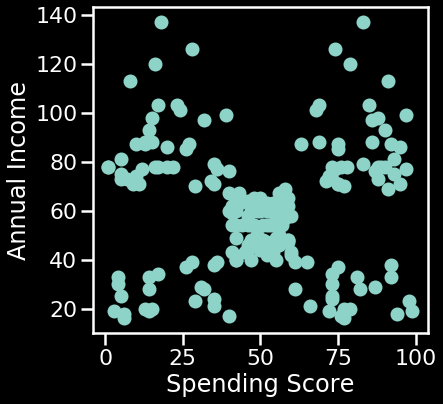

In [8]:
standarized = StandardScaler().fit_transform(df)
standarized


array([[-1.73650982e+00, -1.71043677e+00],
       [-1.73650982e+00,  1.04326457e+00],
       [-1.69793803e+00, -3.91762888e-01],
       [-1.69793803e+00,  1.00448004e+00],
       [-1.65936624e+00, -1.71043677e+00],
       [-1.65936624e+00,  1.70260151e+00],
       [-1.62079445e+00, -1.82679035e+00],
       [-1.62079445e+00,  8.49341941e-01],
       [-1.62079445e+00, -1.40016056e+00],
       [-1.62079445e+00,  1.89652414e+00],
       [-1.58222266e+00, -1.36137604e+00],
       [-1.58222266e+00,  1.04326457e+00],
       [-1.58222266e+00, -1.43894509e+00],
       [-1.58222266e+00,  1.12083362e+00],
       [-1.54365087e+00, -5.85685518e-01],
       [-1.54365087e+00,  6.16634786e-01],
       [-1.46650728e+00, -8.18392673e-01],
       [-1.46650728e+00,  1.85773962e+00],
       [-1.42793549e+00, -5.85685518e-01],
       [-1.42793549e+00,  8.88126467e-01],
       [-1.38936370e+00, -1.74922130e+00],
       [-1.38936370e+00,  8.88126467e-01],
       [-1.27364833e+00, -1.40016056e+00],
       [-1.

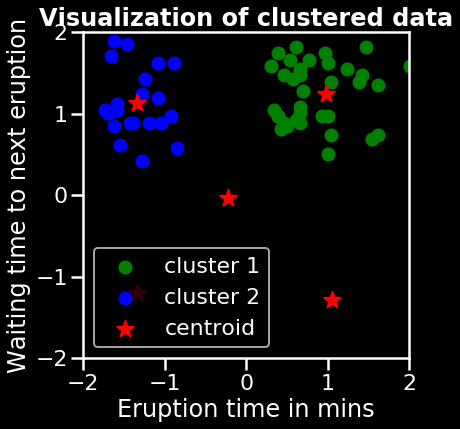

In [21]:


km = Kmeans(n_clusters=5, max_iter=100)
km.fit(standarized)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(standarized[km.labels == 0, 0], standarized[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(standarized[km.labels == 1, 0], standarized[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');


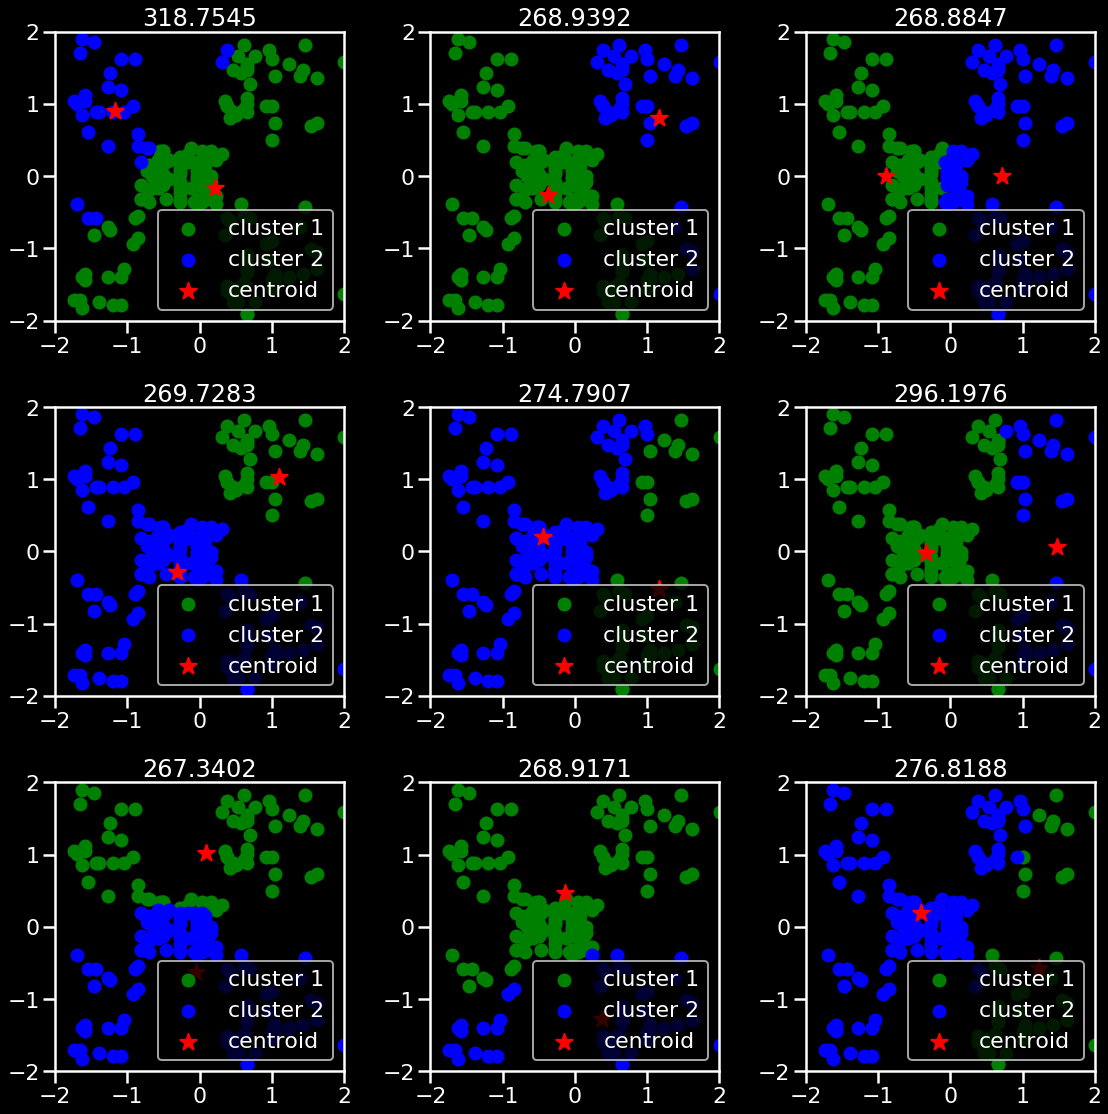

In [18]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = Kmeans(n_clusters=2,
                max_iter=3,
                random_state=np.random.randint(0, 1000, size=1))
    km.fit(standarized)
    centroids = km.centroids
    centers.append(centroids)
    ax[i].scatter(standarized[km.labels == 0, 0], standarized[km.labels == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(standarized[km.labels == 1, 0], standarized[km.labels == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.error:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();
